# Préparation pour la classification binaire

In [42]:
import pandas as pd
from test import convertCatToNum, drop_rows_with_missing, normalize, encode_player_names, split_data
import matplotlib.pyplot as plt
import numpy as np
import time

# on import toutes les données

df_atp = pd.read_csv('all_matches_ATP.csv')

In [43]:
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58182 entries, 0 to 58181
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Court         58182 non-null  object 
 1   Surface       58182 non-null  object 
 2   Round         58182 non-null  object 
 3   Player1_name  58182 non-null  object 
 4   Player2_name  58182 non-null  object 
 5   Player1_rank  58182 non-null  int64  
 6   Player2_rank  58182 non-null  int64  
 7   Comment       58182 non-null  object 
 8   Series        41811 non-null  float64
 9   y             58182 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 4.4+ MB


In [44]:
cat_cols = ['Court','Surface','Round',]

num_cols = ["Player1_rank","Player2_rank","Series",]


In [45]:
df_processed = convertCatToNum(df=df_atp,cat_cols=cat_cols)
df = drop_rows_with_missing(df_processed,columns=["y","Series"])
df_atp = normalize(df,num_cols)


 ===     Replace categorial variable     ===
 ===   Convert categorical to numerical  ===
 ===         drop missing values         ===
 ===            Normalize data           ===


In [46]:
df_atp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41811 entries, 155 to 58181
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player1_name         41811 non-null  object 
 1   Player2_name         41811 non-null  object 
 2   Player1_rank         41811 non-null  float64
 3   Player2_rank         41811 non-null  float64
 4   Comment              41811 non-null  object 
 5   Series               41811 non-null  float64
 6   y                    41811 non-null  int64  
 7   Court_Indoor         41811 non-null  uint8  
 8   Court_Outdoor        41811 non-null  uint8  
 9   Surface_Carpet       41811 non-null  uint8  
 10  Surface_Clay         41811 non-null  uint8  
 11  Surface_Grass        41811 non-null  uint8  
 12  Surface_Hard         41811 non-null  uint8  
 13  Round_1st Round      41811 non-null  uint8  
 14  Round_2nd Round      41811 non-null  uint8  
 15  Round_3rd Round      41811 non-nul

In [47]:
df_atp.head()

,Player1_name,Player2_name,Player1_rank,Player2_rank,Comment,Series,y,Court_Indoor,Court_Outdoor,Surface_Carpet,...,Surface_Grass,Surface_Hard,Round_1st Round,Round_2nd Round,Round_3rd Round,Round_4th Round,Round_Quarterfinals,Round_Round Robin,Round_Semifinals,Round_The Final
155,Dosedel S.,Pioline C.,0.014649,0.005015,Completed,1.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
156,Arthurs W.,Heuberger I.,0.016684,0.069027,Completed,1.0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
157,Squillari F.,Nestor D.,0.002848,0.064307,Completed,1.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
158,Santoro F.,Norman M.,0.009563,0.001180,Completed,1.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
159,Mamiit C.,Prinosil D.,0.025432,0.011504,Completed,1.0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [48]:
df_atp['Comment'].value_counts()

Completed       40248
Retired          1315
Walkover          241
Awarded             3
Disqualified        2
Sched               1
Rrtired             1
Name: Comment, dtype: int64

In [49]:
df_final = encode_player_names(df=df_atp)

=== Encoding player names ===
Encoding completed.


In [50]:
# On sépare le jeu de données
x_train, x_test, y_train, y_test = split_data(df_final, test_size=0.2, random_state=42)

=== Splitting data into train and test sets ===
Data split completed.


In [51]:
X_train = x_train.drop(['Comment'],axis=1)
X_test = x_test.drop(['Comment'],axis=1)

# Decision tree

In [52]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
# Define model
model = DecisionTreeClassifier()


# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'max_features': ['auto', 'sqrt', 'log2']
}

search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)

best_params_deci_tree_bin = result.best_params_
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
# {'max_features': 'auto', 'max_depth': 85}

Best Score: 0.5774335132061708
Best Hyperparameters: {'max_features': 'sqrt', 'max_depth': 55}


In [54]:
model = DecisionTreeClassifier(**best_params_deci_tree_bin)

start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()
DecisionTree_time = end_time - start_time


In [55]:
# Prediction with best model from random search 

y_pred_test = model.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      4246
           1       0.58      0.58      0.58      4117

    accuracy                           0.58      8363
   macro avg       0.58      0.58      0.58      8363
weighted avg       0.58      0.58      0.58      8363



In [56]:
# On va garder le score d'accuracy pour pouvoir le comparer avec d'autres modèle
DescisionTree_score_bin = accuracy_score(y_test, y_pred_test)
DescisionTree_score_bin

0.5830443620710272

# xgboost

XGBoost, ou eXtreme Gradient Boosting, est une bibliothèque de machine learning puissante basée sur des arbres de décision boostés. Elle construit des modèles séquentiels, corrigeant les erreurs des prédictions précédentes à l'aide de la technique de gradient boosting. XGBoost utilise une régularisation efficace pour éviter le surajustement et assigne des importances aux variables pour indiquer leur contribution à la prédiction. Grâce à une optimisation robuste et une gestion flexible des types de données, XGBoost est largement utilisé pour des tâches de classification, de régression et de ranking, se distinguant par sa performance élevée et sa capacité à traiter des ensembles de données volumineux.

En résumé, XGBoost construit des arbres les uns après les autres, corrigeant les erreurs précédentes à chaque étape, tout en utilisant diverses techniques pour optimiser la performance et éviter le surajustement. C'est une méthode puissante et polyvalente largement utilisée dans la pratique.

In [57]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the XGBoost model
model = xgb.XGBClassifier()

# Define the search space (parameter grid)
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),  # Number of boosting rounds
    'max_depth': np.arange(3, 10),  # Maximum tree depth
    'learning_rate': [0.001,0.005,0.01, 0.1],  # Step size shrinkage used in update to prevent overfitting
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
}

# Create a RandomizedSearchCV object
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=1)

# Execute the search
result = search.fit(X_train, y_train)

best_param_Xgboost_bin=result.best_params_

# Summarize the results
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.6569001423705922
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [58]:
best_param_Xgboost_bin

{'subsample': 1.0,
 'n_estimators': 600,
 'max_depth': 4,
 'learning_rate': 0.1,
 'colsample_bytree': 1.0}

In [59]:
# Define the XGBoost model
model = xgb.XGBClassifier(**best_param_Xgboost_bin)

start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()
Xgboost_time = end_time - start_time

In [60]:
# Prediction with best model from random search 
y_pred_test = model.predict(X_test)


print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      4246
           1       0.65      0.66      0.65      4117

    accuracy                           0.66      8363
   macro avg       0.66      0.66      0.66      8363
weighted avg       0.66      0.66      0.66      8363



In [61]:
Xgboost_score_bin = accuracy_score(y_test, y_pred_test)
Xgboost_score_bin

0.6578978835346168

# CatBoost


CatBoost est une bibliothèque de machine learning spécialisée dans les arbres de décision boostés, mettant particulièrement l'accent sur la gestion facile des variables catégorielles. Elle simplifie le processus en traitant directement les variables catégorielles, éliminant ainsi la nécessité de les convertir en variables numériques. CatBoost intègre des mécanismes d'optimisation automatique des hyperparamètres et de régularisation pour prévenir le surajustement. Sa polyvalence en fait un choix adapté à la classification, la régression et le ranking, et il est reconnu pour sa facilité d'utilisation et ses performances élevées, surtout dans les cas où les variables catégorielles sont importantes.

En résum, CatBoost est un algorithme de gradient boosting qui a été conçu pour gérer efficacement les données catégorielles sans nécessiter une préparation de données étendue, comme l'encodage des catégories. 

In [62]:

from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the CatBoost model
model = CatBoostClassifier()

# Define the search space (parameter grid)
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting rounds
    'depth': [8,10,12],  # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Step size shrinkage used in update
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees 
    'colsample_bylevel': [0.7, 0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees at each level
}

# Create a RandomizedSearchCV object
search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=1)

# Execute the search
result = search.fit(X_train, y_train)

best_param_Xgboost_bin = result.best_params_

# Summarize the results
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

0:	learn: 0.6915302	total: 132ms	remaining: 26.3s
1:	learn: 0.6901489	total: 183ms	remaining: 18.1s
2:	learn: 0.6886102	total: 296ms	remaining: 19.5s
3:	learn: 0.6870817	total: 425ms	remaining: 20.8s
4:	learn: 0.6855858	total: 546ms	remaining: 21.3s
5:	learn: 0.6841068	total: 656ms	remaining: 21.2s
6:	learn: 0.6826000	total: 770ms	remaining: 21.2s
7:	learn: 0.6811775	total: 887ms	remaining: 21.3s
8:	learn: 0.6797021	total: 999ms	remaining: 21.2s
9:	learn: 0.6784006	total: 1.13s	remaining: 21.5s
10:	learn: 0.6770864	total: 1.28s	remaining: 22s
11:	learn: 0.6759400	total: 1.3s	remaining: 20.3s
12:	learn: 0.6750025	total: 1.31s	remaining: 18.8s
13:	learn: 0.6737678	total: 1.43s	remaining: 18.9s
14:	learn: 0.6725654	total: 1.53s	remaining: 18.9s
15:	learn: 0.6713736	total: 1.64s	remaining: 18.8s
16:	learn: 0.6700452	total: 1.75s	remaining: 18.8s
17:	learn: 0.6689240	total: 1.79s	remaining: 18.2s
18:	learn: 0.6679440	total: 1.81s	remaining: 17.2s
19:	learn: 0.6669566	total: 1.83s	remaining:

In [63]:
#best_params = {'subsample': 0.8, 'learning_rate': 0.01, 'iterations': 100, 'depth': 12, 'colsample_bylevel': 0.8}
model = CatBoostClassifier(**best_param_Xgboost_bin)

start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()
CatBoost_time = end_time - start_time

0:	learn: 0.6915302	total: 131ms	remaining: 26s
1:	learn: 0.6901489	total: 174ms	remaining: 17.3s
2:	learn: 0.6886102	total: 286ms	remaining: 18.8s
3:	learn: 0.6870817	total: 397ms	remaining: 19.4s
4:	learn: 0.6855858	total: 512ms	remaining: 20s
5:	learn: 0.6841068	total: 616ms	remaining: 19.9s
6:	learn: 0.6826000	total: 732ms	remaining: 20.2s
7:	learn: 0.6811775	total: 844ms	remaining: 20.2s
8:	learn: 0.6797021	total: 952ms	remaining: 20.2s
9:	learn: 0.6784006	total: 1.06s	remaining: 20.2s
10:	learn: 0.6770864	total: 1.17s	remaining: 20.1s
11:	learn: 0.6759400	total: 1.19s	remaining: 18.7s
12:	learn: 0.6750025	total: 1.2s	remaining: 17.3s
13:	learn: 0.6737678	total: 1.31s	remaining: 17.4s
14:	learn: 0.6725654	total: 1.42s	remaining: 17.5s
15:	learn: 0.6713736	total: 1.52s	remaining: 17.5s
16:	learn: 0.6700452	total: 1.64s	remaining: 17.6s
17:	learn: 0.6689240	total: 1.68s	remaining: 17s
18:	learn: 0.6679440	total: 1.7s	remaining: 16.2s
19:	learn: 0.6669566	total: 1.71s	remaining: 15.4

In [64]:
# Prediction with best model from random search 
y_pred_test = model.predict(X_test)
y_pred_test_prob = model.predict_proba(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      4246
           1       0.65      0.65      0.65      4117

    accuracy                           0.66      8363
   macro avg       0.66      0.66      0.66      8363
weighted avg       0.66      0.66      0.66      8363



In [65]:
catboost_score_bin = accuracy_score(y_test, y_pred_test)
catboost_score_bin

0.6568217146956834

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

# Define model
model = LogisticRegression()

# define evaluation
# gkf = GroupKFold(n_splits=3) if not spec as cv= in the randomized search default is 5 fold cv

# define search space
param_grid = {
    'C' : np.logspace(0, 4, num=10),
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'sag']
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)

best_params_logist_reg_bin = result.best_params_
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, 

Best Score: 0.6425498405103667
Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}


In [67]:
# # Prediction with best model from random search 

model = LogisticRegression(**best_params_logist_reg_bin)

start_time = time.time()

model.fit(X_train,y_train)

end_time = time.time()
Logisti_reg_time = end_time - start_time

In [68]:
# y_pred_test = best_random.predict(X_test)
y_pred_test = model.predict(X_test)
y_pred_test_prob = model.predict_proba(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      4246
           1       0.66      0.60      0.63      4117

    accuracy                           0.65      8363
   macro avg       0.65      0.65      0.65      8363
weighted avg       0.65      0.65      0.65      8363



In [69]:
logisti_reg_score_bin = accuracy_score(y_test, y_pred_test)
logisti_reg_score_bin

0.6501255530312089

# RandomForestClassifier

In [70]:
# Define model
model = RandomForestClassifier()

# define evaluation
#gkf = GroupKFold(n_splits=3) if not spec as cv= in the randomized search default is 5 fold cv

# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'n_estimators': list(range(80, 200, 10))
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)

best_params_random_bin = result.best_params_
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6415030556926355
Best Hyperparameters: {'n_estimators': 180, 'max_depth': 55}


In [71]:
#best_params = {'n_estimators': 120, 'max_depth': 55}
model = RandomForestClassifier(**best_params_random_bin)

start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()
Random_time = end_time - start_time

In [72]:
# Prediction with best model from random search 
# best_random = result.best_estimator_
# y_pred_test = best_random.predict(X_test)

y_pred_test = model.predict(X_test)
y_pred_test_prob = model.predict_proba(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.65      0.64      0.64      4246
           1       0.63      0.64      0.64      4117

    accuracy                           0.64      8363
   macro avg       0.64      0.64      0.64      8363
weighted avg       0.64      0.64      0.64      8363



In [73]:
random_score_bin = accuracy_score(y_test, y_pred_test)
random_score_bin

0.6400813105344972

# MLPClassifier

In [74]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [75]:
mlp = MLPClassifier()

# Il s'agit d'une sortie binaire 
# donc la fonction d’activation des neurones de la couche de sortie est 'logistic'
mlp.out_activation_ = 'logistic'
mlp.n_outputs_ = 1

In [76]:
# Grille de recherche d'hyperparamètres
param_grid = {
    'hidden_layer_sizes': [(30, 20, 15, 25),(50, 40, 30,20)],
    'activation':['relu', 'tanh', 'logistic'],#['relu'],
    'solver':  ['adam', 'lbfgs', 'sgd'],# ['adam'],
}

In [77]:
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train)

c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(30, 20, 15, 25),
                                                (50, 40, 30, 20)],
                         'solver': ['adam', 'lbfgs', 'sgd']})

In [78]:
# best_params = {'activation': 'relu', 'hidden_layer_sizes': (30, 20, 15, 25), 'solver': 'lbfgs'}

# Obtenir la meilleure configuration d'hyperparamètres
best_params_mlp_bin = grid_search.best_params_
# meilleur parametre
print(f'Best parameters found : {best_params_mlp_bin}')

Best parameters found : {'activation': 'relu', 'hidden_layer_sizes': (50, 40, 30, 20), 'solver': 'lbfgs'}


In [79]:
best_mlp = MLPClassifier(**best_params_mlp_bin)

start_time = time.time()

best_mlp.fit(X_train, y_train)

end_time = time.time()
mlp_time = end_time - start_time

c:\Users\mathi\anaconda3\envs\Keras\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [80]:
y_pred_test = best_mlp.predict(X_test)
y_pred_test_prob = best_mlp.predict_proba(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51      4246
           1       0.51      0.53      0.52      4117

    accuracy                           0.52      8363
   macro avg       0.52      0.52      0.51      8363
weighted avg       0.52      0.52      0.51      8363



In [81]:
mlp_bin = accuracy_score(y_test, y_pred_test)
mlp_bin

0.515006576587349

# Comparaison modèles binaire

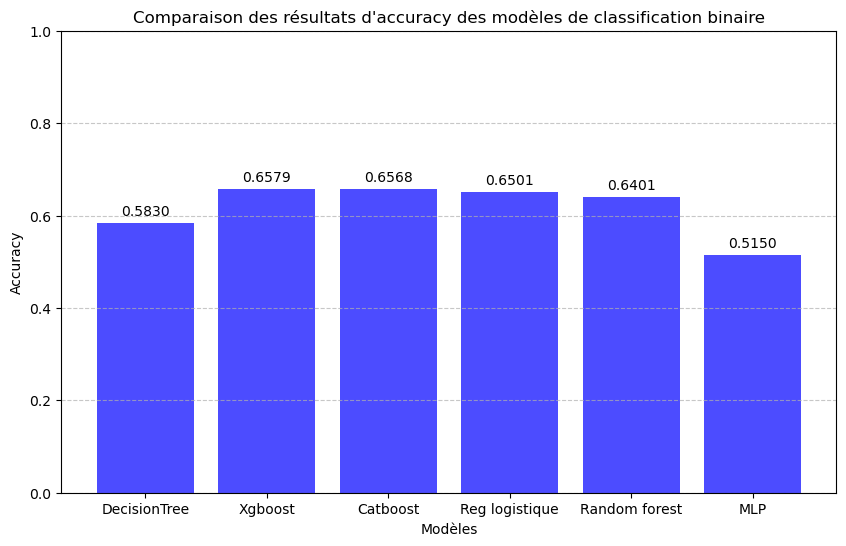

In [82]:
# Scores d'accuracy des différents modèles
accuracy_scores = [DescisionTree_score_bin, Xgboost_score_bin, catboost_score_bin, logisti_reg_score_bin, random_score_bin, mlp_bin] 

# Noms des modèles correspondants
model_names = ['DecisionTree', 'Xgboost', 'Catboost', 'Reg logistique', 'Random forest', 'MLP'] 

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='blue', alpha=0.7)
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.title('Comparaison des résultats d\'accuracy des modèles de classification binaire')
plt.ylim(0, 1)  # Assurez-vous que l'axe y va de 0 à 1 pour l'accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage des scores sur chaque barre
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Affichage de l'histogramme
plt.show()

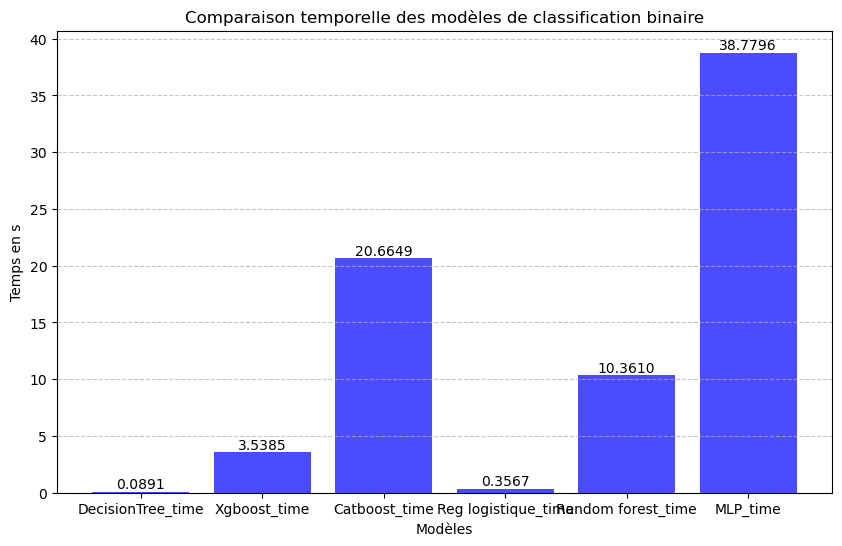

In [86]:
Temps = [DecisionTree_time, Xgboost_time, CatBoost_time, Logisti_reg_time, Random_time, mlp_time] 

# Noms des modèles correspondants
model_names = ['DecisionTree_time', 'Xgboost_time', 'Catboost_time', 'Reg logistique_time', 'Random forest_time', 'MLP_time'] 

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(model_names, Temps, color='blue', alpha=0.7)
plt.xlabel('Modèles')
plt.ylabel('Temps en s')
plt.title('Comparaison temporelle des modèles de classification binaire')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(Temps):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Affichage de l'histogramme
plt.show()